In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import pi

# Set the Seaborn style to whitegrid
sns.set(style='whitegrid')

# Load the datasets (ensure paths are updated to where your files are located)
files = {
    'A2C': 'C:/_source/pesbiu2.0/A2C.xlsx',
    'DDDQN': 'C:/_source/pesbiu2.0/DDDQN.xlsx',
    'DQN': 'C:/_source/pesbiu2.0/DQN.xlsx',
    'Fallback_DDDQN': 'C:/_source/pesbiu2.0/FallDDDQN.xlsx',
    'Hybrid': 'C:/_source/pesbiu2.0/hybrid.xlsx',
    'Static': 'C:/_source/pesbiu2.0/static.xlsx',
    'Threshold': 'C:/_source/pesbiu2.0/treshold.xlsx',
}

# Define a custom color palette for all algorithms
color_palette = {
    'A2C': '#ff7f0e',
    'DDDQN': '#1f77b4',
    'DQN': '#9467bd',
    'Fallback_DDDQN': '#8c564b',
    'Hybrid': '#2ca02c',
    'Static': '#d62728',
    'Threshold': '#FFEE58'
}

# Read each file into a DataFrame
energy_savings = pd.DataFrame({
    'Algorithm': [],
    'Avg_Energy_Saving': [],
})
latency_data = pd.DataFrame({
    'Algorithm': [],
    'Avg_Latency_Before': [],
    'Avg_Latency_After': []
})
throughput_data = pd.DataFrame({
    'Algorithm': [],
    'Avg_Throughput_Before': [],
    'Avg_Throughput_After': []
})
overall_metrics = pd.DataFrame({
    'Algorithm': [],
    'Avg_Energy_Saving': [],
    'Avg_Latency_After': [],
    'Avg_Throughput_After': []
})

In [2]:

# Extract energy saving, latency, and throughput data from each dataset and add it to combined DataFrames
for algorithm, file_path in files.items():
    df = pd.read_excel(file_path)
    if 'Avg_Energy_Saving' in df.columns and 'Avg_Energy_Before' in df.columns:
        energy_data = df[['Avg_Energy_Saving', 'Avg_Energy_Before']].copy()
        energy_data['Algorithm'] = algorithm
        energy_savings = pd.concat([energy_savings, energy_data], ignore_index=True)

    if 'Avg_Latency_Before' in df.columns and 'Avg_Latency_After' in df.columns:
        latency_data_temp = df[['Avg_Latency_Before', 'Avg_Latency_After']].copy()
        latency_data_temp['Algorithm'] = algorithm
        latency_data = pd.concat([latency_data, latency_data_temp], ignore_index=True)
    
    if 'Avg_Throughput_Before' in df.columns and 'Avg_Throughput_After' in df.columns:
        throughput_data_temp = df[['Avg_Throughput_Before', 'Avg_Throughput_After']].copy()
        throughput_data_temp['Algorithm'] = algorithm
        throughput_data = pd.concat([throughput_data, throughput_data_temp], ignore_index=True)



C:\Users\xkolac15\AppData\Local\Temp\ipykernel_6460\4105029204.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=energy_savings_sorted, x='Algorithm', y='Avg_Energy_Saving', ci=None, palette=color_palette)
C:\Users\xkolac15\AppData\Local\Temp\ipykernel_6460\4105029204.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=energy_savings_sorted, x='Algorithm', y='Avg_Energy_Saving', ci=None, palette=color_palette)


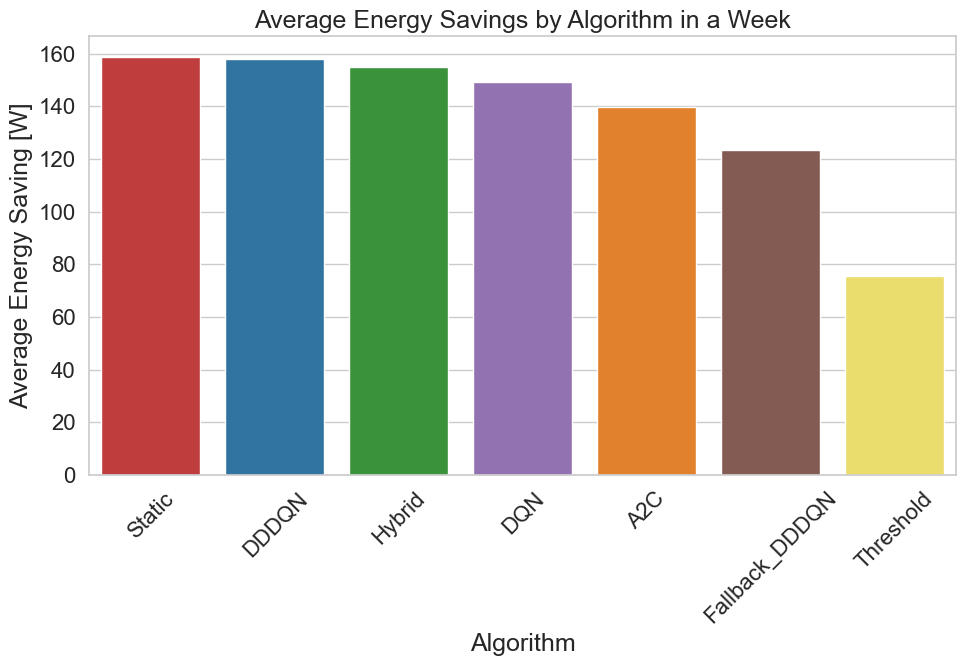

C:\Users\xkolac15\AppData\Local\Temp\ipykernel_6460\4105029204.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=energy_savings, x='Algorithm', y='Avg_Energy_Saving', palette=color_palette)


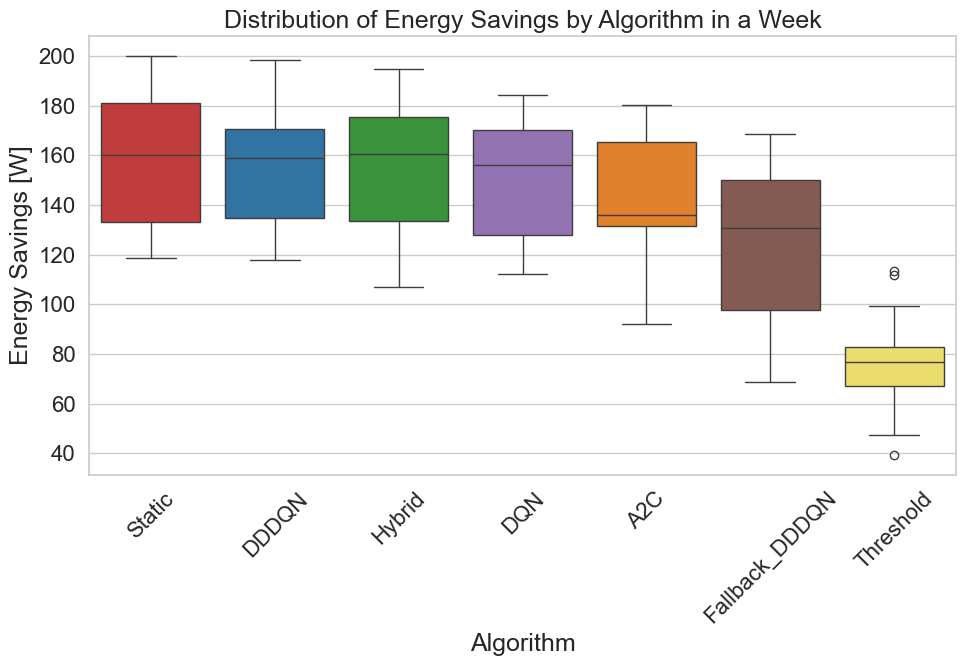

In [3]:
# Sort the DataFrame by average energy savings in descending order
energy_savings_sorted = energy_savings.groupby('Algorithm').mean().sort_values(by='Avg_Energy_Saving', ascending=False).reset_index()

# Set the font size for the plots
plt.rc('font', size=18)

# Plotting the Bar Chart for Average Energy Savings by Algorithm (sorted from best to worst)
plt.figure(figsize=(10, 7))
sns.barplot(data=energy_savings_sorted, x='Algorithm', y='Avg_Energy_Saving', ci=None, palette=color_palette)
plt.title('Average Energy Savings by Algorithm in a Week', fontsize=18)
plt.xlabel('Algorithm', fontsize=18)
plt.ylabel('Average Energy Saving [W]', fontsize=18)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

# Plotting the Box Plot for Distribution of Energy Savings by Algorithm (sorted from best to worst)
plt.figure(figsize=(10, 7))
energy_savings['Algorithm'] = pd.Categorical(energy_savings['Algorithm'], categories=energy_savings_sorted['Algorithm'], ordered=True)
sns.boxplot(data=energy_savings, x='Algorithm', y='Avg_Energy_Saving', palette=color_palette)
plt.title('Distribution of Energy Savings by Algorithm in a Week', fontsize=18)
plt.xlabel('Algorithm', fontsize=18)
plt.ylabel('Energy Savings [W]', fontsize=18)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

In [4]:
print("Exact average energy savings for each algorithm:")
print(energy_savings_sorted[['Algorithm', 'Avg_Energy_Saving']])

Exact average energy savings for each algorithm:
        Algorithm  Avg_Energy_Saving
0          Static         158.622754
1           DDDQN         157.941856
2          Hybrid         154.795670
3             DQN         149.317600
4             A2C         139.658995
5  Fallback_DDDQN         123.303563
6       Threshold          75.684391


In [5]:
# Displaying exact values for average energy savings and energy before for each algorithm
print("Exact average energy usage and savings for each algorithm:")
print(energy_savings_sorted[['Algorithm', 'Avg_Energy_Before', 'Avg_Energy_Saving']])


Exact average energy usage and savings for each algorithm:
        Algorithm  Avg_Energy_Before  Avg_Energy_Saving
0          Static         383.190394         158.622754
1           DDDQN         383.190394         157.941856
2          Hybrid         383.190394         154.795670
3             DQN         383.190394         149.317600
4             A2C         383.190394         139.658995
5  Fallback_DDDQN         383.190394         123.303563
6       Threshold         383.190394          75.684391


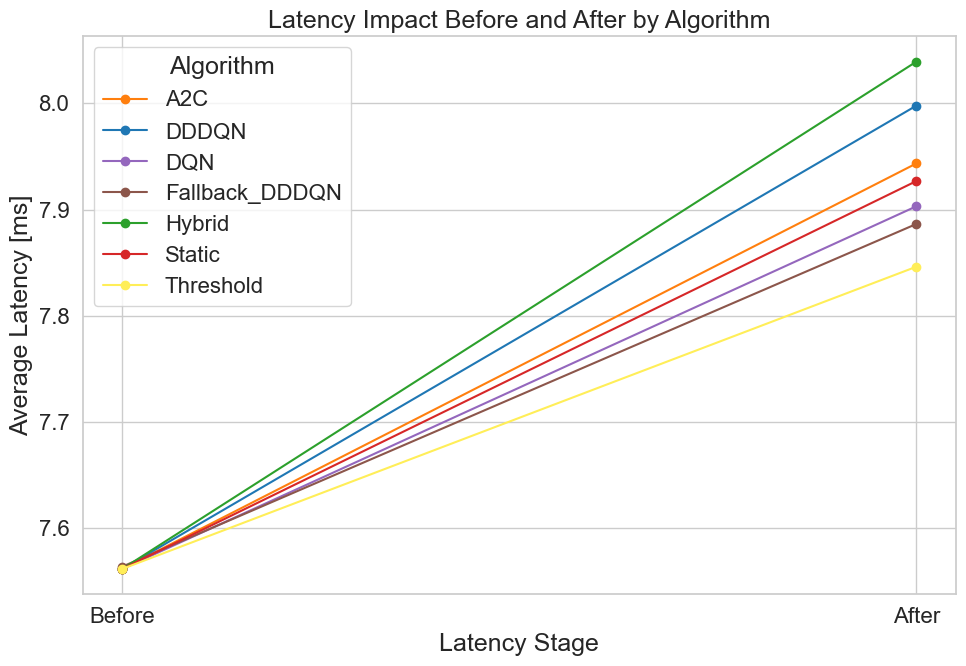

In [6]:
# Plotting Latency Impact Analysis
# Line Chart: Avg Latency Before and After for each Algorithm
plt.figure(figsize=(10, 7))
for algorithm in latency_data['Algorithm'].unique():
    subset = latency_data[latency_data['Algorithm'] == algorithm]
    plt.plot(['Before', 'After'], [subset['Avg_Latency_Before'].mean(), subset['Avg_Latency_After'].mean()], 
             marker='o', label=algorithm, color=color_palette[algorithm])
plt.title('Latency Impact Before and After by Algorithm', fontsize=18)
plt.xlabel('Latency Stage', fontsize=18)
plt.ylabel('Average Latency [ms]', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Algorithm', fontsize=16, title_fontsize=18)
plt.tight_layout()
plt.show()

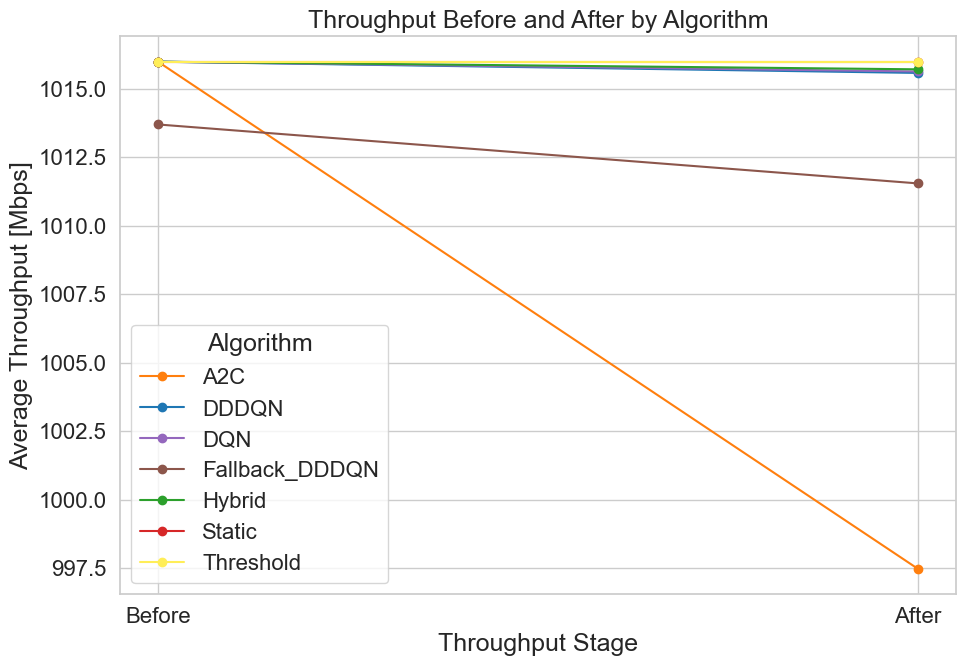

In [7]:
# Line Chart: Throughput Before vs After for each Algorithm
plt.figure(figsize=(10, 7))
for algorithm in throughput_data['Algorithm'].unique():
    subset = throughput_data[throughput_data['Algorithm'] == algorithm]
    plt.plot(['Before', 'After'], [subset['Avg_Throughput_Before'].mean(), subset['Avg_Throughput_After'].mean()], 
             marker='o', label=algorithm, color=color_palette[algorithm])
plt.title('Throughput Before and After by Algorithm', fontsize=18)
plt.xlabel('Throughput Stage', fontsize=18)
plt.ylabel('Average Throughput [Mbps]', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Algorithm', fontsize=16, title_fontsize=18)
plt.tight_layout()
plt.show()

In [8]:
# Debug: Print average throughput before and after for each algorithm
for algorithm in throughput_data['Algorithm'].unique():
    subset = throughput_data[throughput_data['Algorithm'] == algorithm]
    avg_throughput_before = subset['Avg_Throughput_Before'].dropna().mean()
    avg_throughput_after = subset['Avg_Throughput_After'].dropna().mean()
    print(f"{algorithm} - Before: {avg_throughput_before}, After: {avg_throughput_after}")


A2C - Before: 1015.9968223809523, After: 997.4802171428573
DDDQN - Before: 1015.9968223809523, After: 1015.5865252380952
DQN - Before: 1015.9968223809523, After: 1015.6404952380951
Fallback_DDDQN - Before: 1013.7049876190476, After: 1011.5531347619047
Hybrid - Before: 1015.9968223809523, After: 1015.7181457142859
Static - Before: 1015.9968223809523, After: 1015.9968223809523
Threshold - Before: 1015.9968223809523, After: 1015.9968223809523


In [9]:
# Debug: Print average Energy_Saving before and after for each algorithm
for algorithm in throughput_data['Algorithm'].unique():
    subset = throughput_data[throughput_data['Algorithm'] == algorithm]
    avg_throughput_before = subset['Avg_Throughput_Before'].dropna().mean()
    avg_throughput_after = subset['Avg_Throughput_After'].dropna().mean()
    print(f"{algorithm} - Before: {avg_throughput_before}, After: {avg_throughput_after}")


A2C - Before: 1015.9968223809523, After: 997.4802171428573
DDDQN - Before: 1015.9968223809523, After: 1015.5865252380952
DQN - Before: 1015.9968223809523, After: 1015.6404952380951
Fallback_DDDQN - Before: 1013.7049876190476, After: 1011.5531347619047
Hybrid - Before: 1015.9968223809523, After: 1015.7181457142859
Static - Before: 1015.9968223809523, After: 1015.9968223809523
Threshold - Before: 1015.9968223809523, After: 1015.9968223809523


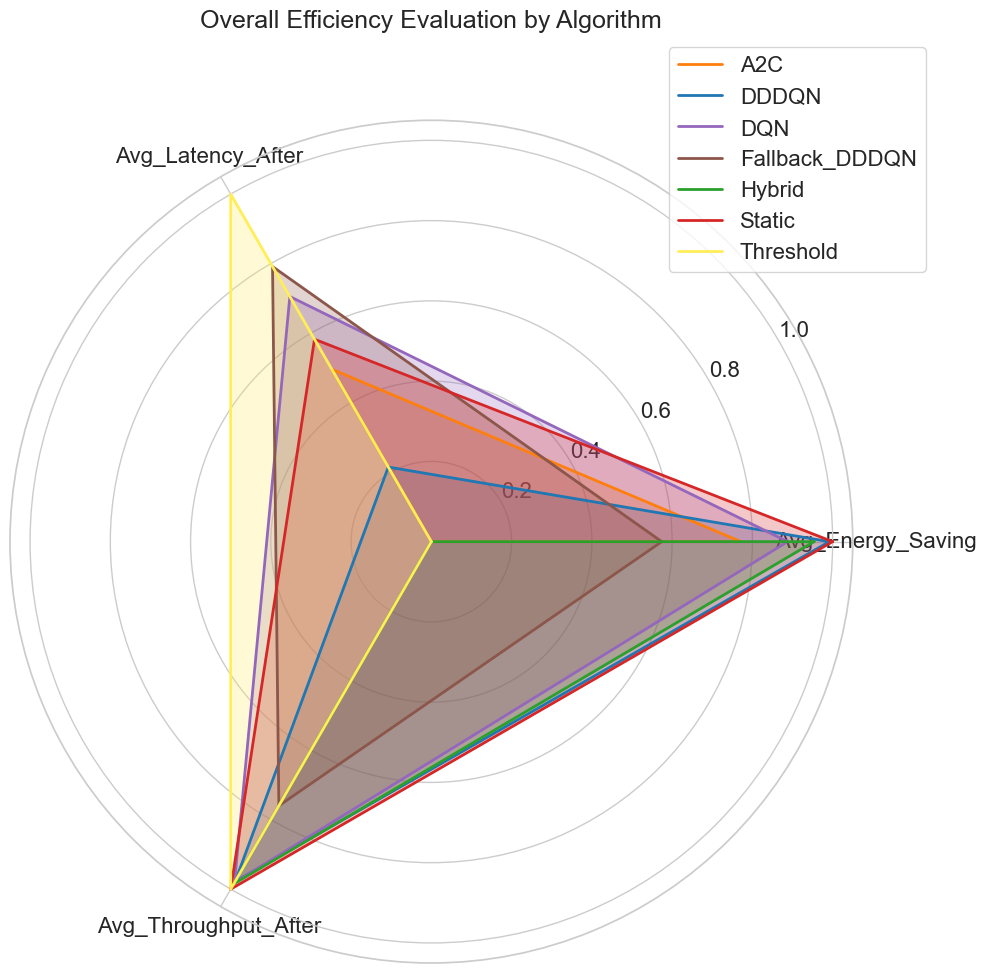

In [3]:
# Calculating average metrics for each algorithm and adding to overall_metrics
for algorithm in files.keys():
    df = pd.read_excel(files[algorithm])
    avg_energy_saving = df['Avg_Energy_Saving'].mean() if 'Avg_Energy_Saving' in df.columns else 0
    avg_latency_after = df['Avg_Latency_After'].mean() if 'Avg_Latency_After' in df.columns else 0
    avg_throughput_after = df['Avg_Throughput_After'].mean() if 'Avg_Throughput_After' in df.columns else 0
    overall_metrics = pd.concat([overall_metrics, pd.DataFrame({
        'Algorithm': [algorithm],
        'Avg_Energy_Saving': [avg_energy_saving],
        'Avg_Latency_After': [avg_latency_after],
        'Avg_Throughput_After': [avg_throughput_after]
    })], ignore_index=True)

# Normalizing the metrics to bring them all to a 0-1 range
metrics = ['Avg_Energy_Saving', 'Avg_Latency_After', 'Avg_Throughput_After']
normalized_metrics = overall_metrics.copy()

for metric in metrics:
    min_value = overall_metrics[metric].min()
    max_value = overall_metrics[metric].max()
    # Normalize the values to range 0-1
    if metric == 'Avg_Latency_After':
        # Invert latency so that lower latency is better (closer to 1)
        normalized_metrics[metric] = (max_value - overall_metrics[metric]) / (max_value - min_value) if max_value - min_value != 0 else 0
    else:
        normalized_metrics[metric] = (overall_metrics[metric] - min_value) / (max_value - min_value) if max_value - min_value != 0 else 0

# Prepare the Radar Chart
categories = metrics
N = len(categories)

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Close the circle

plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

# Plotting each algorithm's normalized values on the radar chart
for i in range(len(normalized_metrics)):
    values = normalized_metrics.loc[i, metrics].tolist()
    values += values[:1]  # Closing the loop for radar chart

    algorithm = normalized_metrics.loc[i, 'Algorithm']
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=algorithm, color=color_palette[algorithm])
    ax.fill(angles, values, alpha=0.25, color=color_palette[algorithm])

# Formatting the radar chart
plt.xticks(angles[:-1], categories, fontsize=16)
ax.set_rlabel_position(30)
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ['0.2', '0.4', '0.6', '0.8', '1.0'], fontsize=16)
plt.title('Overall Efficiency Evaluation by Algorithm', size=18, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1), fontsize=16)
plt.tight_layout()
plt.show()


In [138]:
overall_metrics = pd.DataFrame({'Algorithm': [], 'Avg_Energy_Saving': [], 'Avg_Latency_After': [], 'Avg_Throughput_After': []})

<Figure size 1000x1000 with 0 Axes>

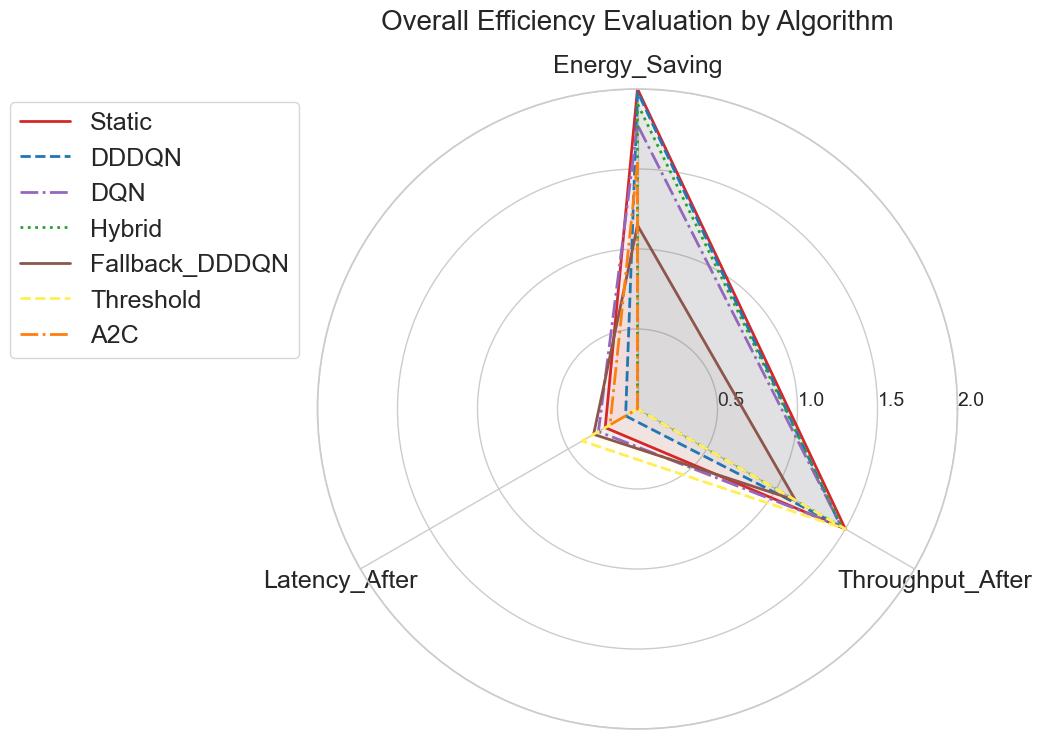

In [139]:
for algorithm, file_path in files.items():
    df = pd.read_excel(file_path)
    avg_energy_saving = df['Avg_Energy_Saving'].mean() if 'Avg_Energy_Saving' in df.columns else 0
    avg_latency_after = df['Avg_Latency_After'].mean() if 'Avg_Latency_After' in df.columns else 0
    avg_throughput_after = df['Avg_Throughput_After'].mean() if 'Avg_Throughput_After' in df.columns else 0
    overall_metrics = pd.concat([
        overall_metrics, 
        pd.DataFrame({
            'Algorithm': [algorithm],
            'Avg_Energy_Saving': [avg_energy_saving],
            'Avg_Latency_After': [avg_latency_after],
            'Avg_Throughput_After': [avg_throughput_after]
        })
    ], ignore_index=True)

metrics = ['Avg_Energy_Saving', 'Avg_Latency_After', 'Avg_Throughput_After']
normalized_metrics = overall_metrics.copy()

for metric in metrics:
    min_value = overall_metrics[metric].min()
    max_value = overall_metrics[metric].max()
    if metric == 'Avg_Latency_After':
        normalized_metrics[metric] = (max_value - overall_metrics[metric]) / (max_value - min_value) if max_value != min_value else 0
    else:
        normalized_metrics[metric] = (overall_metrics[metric] - min_value) / (max_value - min_value) if max_value != min_value else 0

# Weight the metrics to emphasize Energy Saving
energy_weight = 2.0
latency_weight = 0.4
throughput_weight = 1.5

normalized_metrics['Avg_Energy_Saving'] *= energy_weight
normalized_metrics['Avg_Latency_After'] *= latency_weight
normalized_metrics['Avg_Throughput_After'] *= throughput_weight

# Add a total score to sort algorithms
normalized_metrics['Total_Score'] = normalized_metrics['Avg_Energy_Saving'] + normalized_metrics['Avg_Latency_After'] + normalized_metrics['Avg_Throughput_After']
normalized_metrics = normalized_metrics.sort_values('Total_Score', ascending=False)

categories = metrics
N = len(categories)

# Start Energy Saving at the top
angles = [pi/2 + 2*pi*i/N for i in range(N)]
angles += angles[:1]

plt.figure(figsize=(10,10))
fig, ax = plt.subplots(figsize=(8,8), subplot_kw={'polar': True})

# Remove fill and reduce clutter
line_styles = ['solid', 'dashed', 'dashdot', 'dotted']
for i, (idx, row) in enumerate(normalized_metrics.iterrows()):
    values = row[metrics].tolist()
    values += values[:1]
    algorithm = row['Algorithm']
    ax.plot(angles, values, linewidth=2, linestyle=line_styles[i % len(line_styles)], 
            label=algorithm, color=color_palette.get(algorithm, 'gray'))
    # No fill or very light fill
    ax.fill(angles, values, alpha=0.05, color=color_palette.get(algorithm, 'gray'))

ax.set_xticks(angles[:-1])
ax.set_xticklabels(['Energy_Saving', 'Latency_After', 'Throughput_After'], fontsize=18)

ax.set_rlabel_position(0)
plt.yticks([0.5, 1.0, 1.5, 2.0], ['0.5', '1.0', '1.5', '2.0'], fontsize=14)
plt.ylim(0, 2.0)

plt.title('Overall Efficiency Evaluation by Algorithm', fontsize=20, y=1.08)
plt.legend(loc='upper left',bbox_to_anchor=(-0.5, 1.0), fontsize=18)

# Adjust subplot spacing
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

plt.show()

C:\Users\xkolac15\AppData\Local\Temp\ipykernel_2716\2298196059.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=overall_metrics_sorted, x='Algorithm', y='Efficiency_Score', palette=colors)


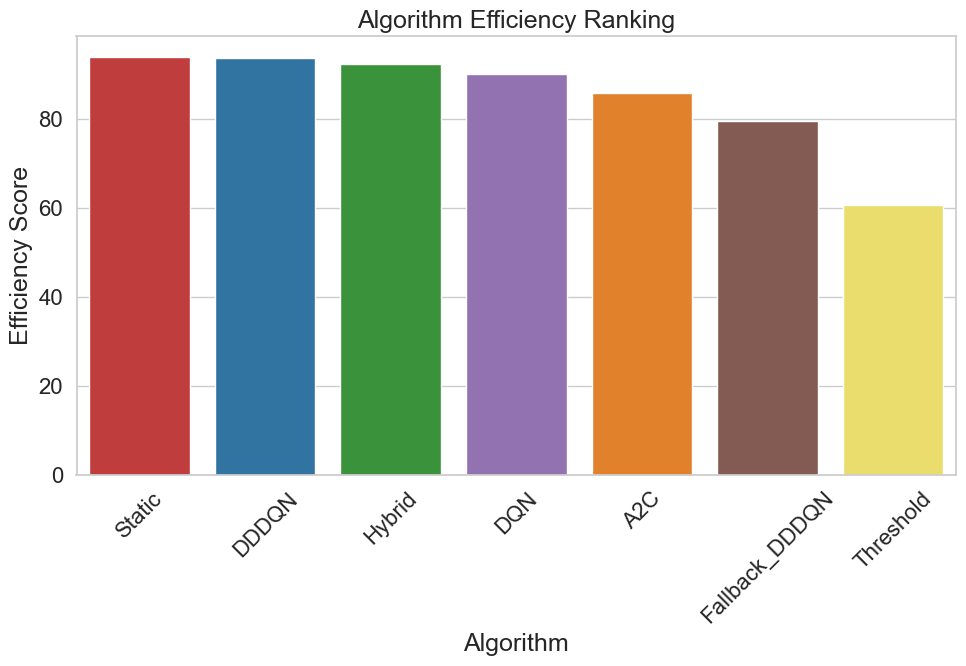

In [11]:
# Algorithm Efficiency Ranking
# Ranking Algorithms based on combined metrics
overall_metrics['Efficiency_Score'] = (
    overall_metrics['Avg_Energy_Saving'] * 0.4 + 
    (1 / (overall_metrics['Avg_Latency_After'] + 1e-5)) * 0.3 + 
    overall_metrics['Avg_Throughput_After'] * 0.3
)
overall_metrics_sorted = overall_metrics.sort_values(by='Efficiency_Score', ascending=False).reset_index(drop=True)

# Create a color list using the custom color palette to ensure consistency
colors = [color_palette[algorithm] for algorithm in overall_metrics_sorted['Algorithm']]

# Plotting the Efficiency Ranking
plt.figure(figsize=(10, 7))
sns.barplot(data=overall_metrics_sorted, x='Algorithm', y='Efficiency_Score', palette=colors)
plt.title('Algorithm Efficiency Ranking', fontsize=18)
plt.xlabel('Algorithm', fontsize=18)
plt.ylabel('Efficiency Score', fontsize=18)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()


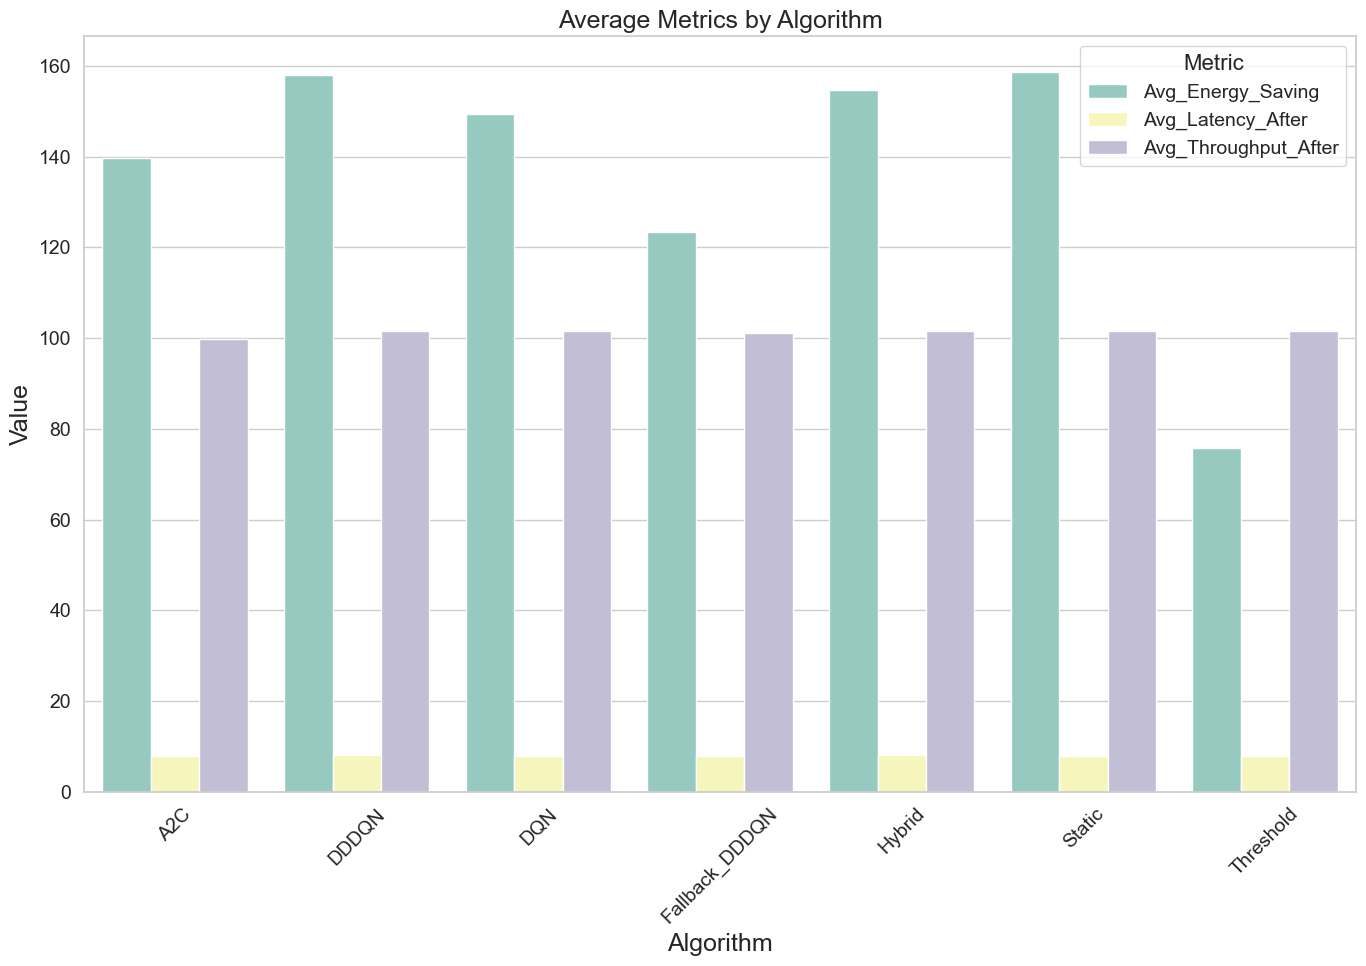

In [9]:
# Bar Plot for Average Metrics
# Plotting Average Metrics (Energy Saving, Latency, Throughput) for each Algorithm
overall_metrics_melted = overall_metrics.melt(id_vars='Algorithm', value_vars=['Avg_Energy_Saving', 'Avg_Latency_After', 'Avg_Throughput_After'], var_name='Metric', value_name='Value')
plt.figure(figsize=(14, 10))
sns.barplot(data=overall_metrics_melted, x='Algorithm', y='Value', hue='Metric', palette='Set3')
plt.title('Average Metrics by Algorithm', fontsize=18)
plt.xlabel('Algorithm', fontsize=18)
plt.ylabel('Value', fontsize=18)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Metric', fontsize=14, title_fontsize=16)
plt.tight_layout()
plt.show()
